In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dog = pd.read_csv('dog.csv')

In [ ]:
cat = pd.read_csv('cat.csv')

In [ ]:
dog = dog.transpose()
print(dog.shape)

(80, 4096)


In [ ]:
import cv2

In [ ]:
dog1 = np.array(dog.iloc[:,1])

In [ ]:
dog1reshape = np.reshape(dog1,(64,64))

In [ ]:
cv2.imshow(dog1reshape,cmap='gray')

TypeError: Required argument 'mat' (pos 2) not found

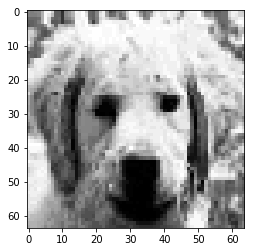

In [ ]:
plt.imshow(dog1reshape.T,cmap='gray')
plt.show()

In [ ]:
dog_x = np.array(dog.iloc[:,:]).T
cat_x = np.array(cat.iloc[:,:]).T
X = np.concatenate([dog_x , cat_x])
print(X)
print(X.shape)

[[224 224 224 ... 100 100 100]
 [131 124 104 ... 104 124 124]
 [127 136 127 ... 115 104 104]
 ...
 [ 60  50  63 ... 105 118 104]
 [223 224 225 ... 180 182 177]
 [101 107 106 ... 114  91 113]]
(160, 4096)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print (np.sum(pca_digits.explained_variance_ratio_))

X_inv_proj = pca.inverse_transform(X_pca)
print(X_inv_proj.shape)

original shape:    (160, 4096)
transformed shape: (160, 49)
0.8414066792437136
(160, 4096)


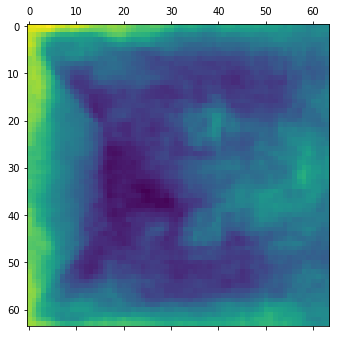

In [ ]:
fig = plt.figure(figsize=(64, 64))
for i in range(1):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.matshow(pca.components_[i].reshape(64,64))
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.75, random_state = 42)

In [ ]:
y = np.concatenate((np.ones((80,1)),np.zeros((80,1))), axis = 0)
print(y)
print(y.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(160, 1)


In [ ]:
logreg = lr.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.8083333333333333


/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr.predict(X_test)

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1.])

In [ ]:
X[1].shape

(4096,)

In [ ]:
print(pca.explained_variance_ratio_)

[0.5738213  0.26758538 0.15859332]


In [ ]:
print(pca.singular_values_)

[4871.52379741 3326.65440972 2561.05521936]


In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (4096, 3)
transformed shape: (4096, 1)


In [ ]:
print (X.shape, X_pca.shape)

(4096, 3) (4096, 1)


In [ ]:
pca_digits=PCA(2) 
X_proj = pca_digits.fit_transform(X) 
print (np.sum(pca_digits.explained_variance_ratio_))

0.8414066792437136


In [ ]:
X_proj.shape

(4096, 2)

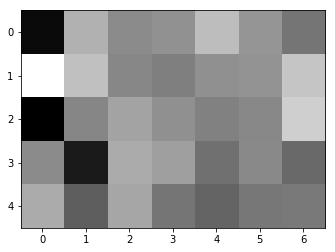

In [ ]:
x1 = np.reshape(X_pca[1],(7,5))
plt.imshow(x1.T,cmap='gray')
plt.show()

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from google.colab import files
##upload Data
uploaded = files.upload()
 
##convert into CSV
import io
df = pd.read_csv(io.StringIO(uploaded['mnist_test.csv'].decode('utf-8')))
print(df)


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# convert to array from dataframe
y = df.iloc[:,0].values
x = df.iloc[:,1:].values
 
##print 1st observation
plt.matshow(x[0].reshape(28,28))
 
# pca with 90% variability
pca_digits = PCA(0.90)
X_proj = pca_digits.fit_transform(x)
#converting to 28x28 df
X_inv_proj = pca_digits.inverse_transform(X_proj)
 
##first 5 PC
fig = plt.figure(figsize=(28, 28))
for i in range(5):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.matshow(pca_digits.components_[i].reshape(28,28))
plt.show()
 
##original digits
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x[i].reshape(28,28), cmap=plt.cm.bone)
 
#converting to 28x28 to display image
X_proj_img = np.reshape(X_inv_proj, (10000, 28, 28))
fig = plt.figure(figsize=(8, 6))
# plot projection images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i].reshape(28,28), cmap=plt.cm.bone)